### **Importing necessary libraries**

In [1]:
import keras
import matplotlib.pyplot as plt
import os
import cv2 
import numpy as np
import random
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

### **Importing Data**

In [2]:
categories = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
img_size = 64

In [3]:
data_path = "datasets/leapGestRecog/leapGestRecog"

image_data = []

for dr in os.listdir(data_path):
    for class_index, category in enumerate(categories):
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (img_size, img_size)), class_index])
            except Exception as e:
                print(e)

In [4]:
image_data[0]

[array([[5, 6, 4, ..., 3, 4, 4],
        [4, 5, 6, ..., 3, 4, 2],
        [4, 6, 4, ..., 2, 3, 4],
        ...,
        [5, 6, 6, ..., 8, 6, 5],
        [5, 5, 4, ..., 5, 5, 5],
        [4, 6, 5, ..., 4, 5, 4]], dtype=uint8),
 0]

In [5]:
random.shuffle(image_data)

In [6]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [7]:
label[:10]

[8, 9, 1, 2, 2, 4, 3, 8, 2, 5]

### **Visualizing Data**

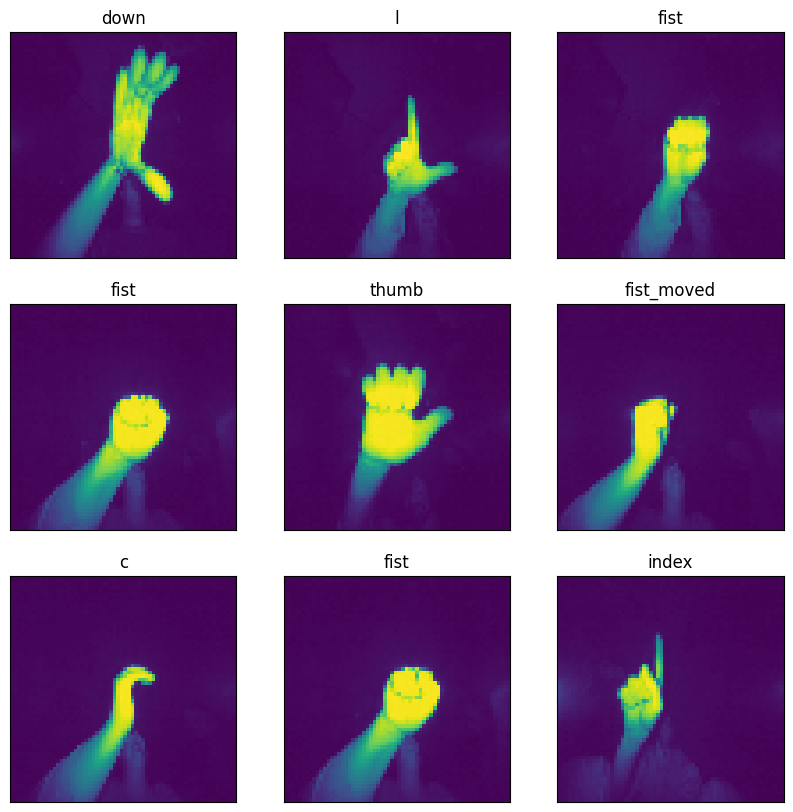

In [8]:
plt.figure(1, figsize = (10,10))

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(input_data[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])
    
plt.show()

### **Normalizing the Data**

In [9]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 64, 64)

### **Train-Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state = 0)

### **Model**

In [11]:
model = keras.models.Sequential([
    Input(shape = (img_size, img_size, 1)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Dropout(0.3),

    Flatten(),

    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,242,154 (12.37 MB)

 Trainable params: 3,242,154 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### **Model Training & Accuracy**

In [15]:
model.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9997 - val_loss: 7.6952e-04
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 2.2014e-04
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - accuracy: 0.9999 - loss: 4.2529e-04 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 2.0017e-05
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 1.0000 - loss: 2.2579e-05 - val_accuracy: 1.0000 - val_loss: 6.7098e-06


### **Saving the Model**

In [16]:
model.save('hand_gesture.keras')